In [9]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [26]:
#importing packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD

In [27]:
#setting figure size
rcParams['figure.figsize'] = 20,10

#for normalizing data
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('/content/drive/My Drive/Covid 19 part(2)/LSTM/TSLA_JAN18_JULY20.csv')
df_daily = pd.read_csv('/content/drive/My Drive/Covid 19 part(2)/LSTM/TSLA_daily.csv')
df = df.append(df_daily)
#print the head
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-19,345.000000,350.589996,342.600006,350.019989,350.019989,4888300.0
1,2018-01-22,349.399994,357.829987,349.200012,351.559998,351.559998,6210400.0
2,2018-01-23,360.000000,360.500000,351.000000,352.790009,352.790009,5465400.0
3,2018-01-24,354.579987,354.750000,343.519989,345.890015,345.890015,5287500.0
4,2018-01-25,348.269989,349.200012,336.399994,337.640015,337.640015,6740300.0
...,...,...,...,...,...,...,...
627,2020-07-17,1513.449951,1537.510010,1490.000000,1500.839966,1500.839966,9330000.0
628,2020-07-20,1519.010010,1650.000000,1488.000000,1643.000000,1643.000000,17044800.0
0,"Jul 21, 2020",1639.930000,1675.000000,1558.000000,1568.360000,1568.360000,16157300.0
1,"Jul 22, 2020",1599.000000,1626.420000,1562.000000,1592.330000,1592.330000,13902500.0


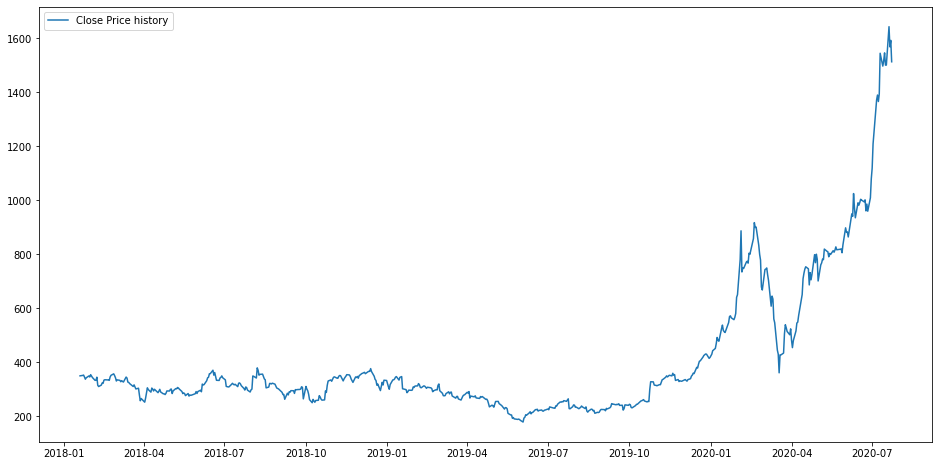

In [28]:
#setting index as date
#df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df['Date'] = pd.to_datetime(df.Date)
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')
plt.legend()

In [ ]:
# #setting index as date
# #df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
# df['Date'] = pd.to_datetime(df.Date)
# df.index = df['Date']

# #plot
# plt.figure(figsize=(16,8))
# plt.plot(df['Open'], label='Open Price history')
# plt.legend()

In [29]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[:]
valid = dataset[450:,:]



In [61]:
# #creating dataframe
# data = df.sort_index(ascending=True, axis=0)
# new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Open'])
# for i in range(0,len(data)):
#     new_data['Date'][i] = data['Date'][i]
#     new_data['Open'][i] = data['Open'][i]

# #setting index
# new_data.index = new_data.Date
# new_data.drop('Date', axis=1, inplace=True)

# #creating train and test sets
# dataset = new_data.values

# train = dataset[:]
# valid = dataset[450:,:]


In [30]:
#converting dataset into x_train and y_train
T = 30 #training period (essentially the number of features)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(T,len(train)):
    x_train.append(scaled_data[i-T:i,0])
    y_train.append(scaled_data[i,0])

x_train, y_train = shuffle(x_train, y_train)  #shuffling the dataset
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print(x_train.shape, y_train.shape)

(602, 30, 1) (602,)


In [31]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, activation='tanh', input_shape=(T,1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, activation='tanh'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 50)            10400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 91,101
Trainable params: 91,101
Non-trainable params: 0
__________________________________________________

In [55]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=300, return_sequences=True, activation='tanh', input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.1))
#model.add(BatchNormalization())
model.add(LSTM(units=250, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
#model.add(BatchNormalization())
model.add(LSTM(units=150, activation='tanh', return_sequences= True))
model.add(Dropout(0.2))
#model.add(BatchNormalization())
model.add(LSTM(units=150, activation='tanh', return_sequences= True))
model.add(Dropout(0.1))
#model.add(BatchNormalization())
model.add(LSTM(units=100, activation='tanh'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 30, 300)           362400    
_________________________________________________________________
dropout_20 (Dropout)         (None, 30, 300)           0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 30, 250)           551000    
_________________________________________________________________
dropout_21 (Dropout)         (None, 30, 250)           0         
_________________________________________________________________
lstm_28 (LSTM)               (None, 30, 150)           240600    
_________________________________________________________________
dropout_22 (Dropout)         (None, 30, 150)           0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 30, 150)          

In [32]:
import time
start = time.time()
model.fit(x_train, y_train, epochs=100, batch_size=16)
end = time.time()
print('Run time: {}'.format((end-start)/60))

Epoch 1/100
38/38 [==============================] - 2s 50ms/step - loss: 0.0086
Epoch 2/100
38/38 [==============================] - 2s 48ms/step - loss: 0.0031
Epoch 3/100
38/38 [==============================] - 2s 52ms/step - loss: 0.0023
Epoch 4/100
38/38 [==============================] - 2s 52ms/step - loss: 0.0018
Epoch 5/100
38/38 [==============================] - 2s 54ms/step - loss: 0.0023
Epoch 6/100
38/38 [==============================] - 2s 51ms/step - loss: 0.0024
Epoch 7/100
38/38 [==============================] - 2s 54ms/step - loss: 0.0017
Epoch 8/100
38/38 [==============================] - 2s 53ms/step - loss: 0.0015
Epoch 9/100
38/38 [==============================] - 2s 52ms/step - loss: 0.0018
Epoch 10/100
38/38 [==============================] - 2s 51ms/step - loss: 0.0014
Epoch 11/100
38/38 [==============================] - 2s 53ms/step - loss: 0.0014
Epoch 12/100
38/38 [==============================] - 2s 53ms/step - loss: 0.0013
Epoch 13/100
38/38 [=====

In [20]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - T:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(T,inputs.shape[0]):
    X_test.append(inputs[i-T:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [ ]:
print(closing_price.shape)
print(X_test.shape)
print(x_train.shape)
print(y_train.shape)

In [21]:
#rms error
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms
#np.mean(np.abs(valid - closing_price))

53.32846247675679

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


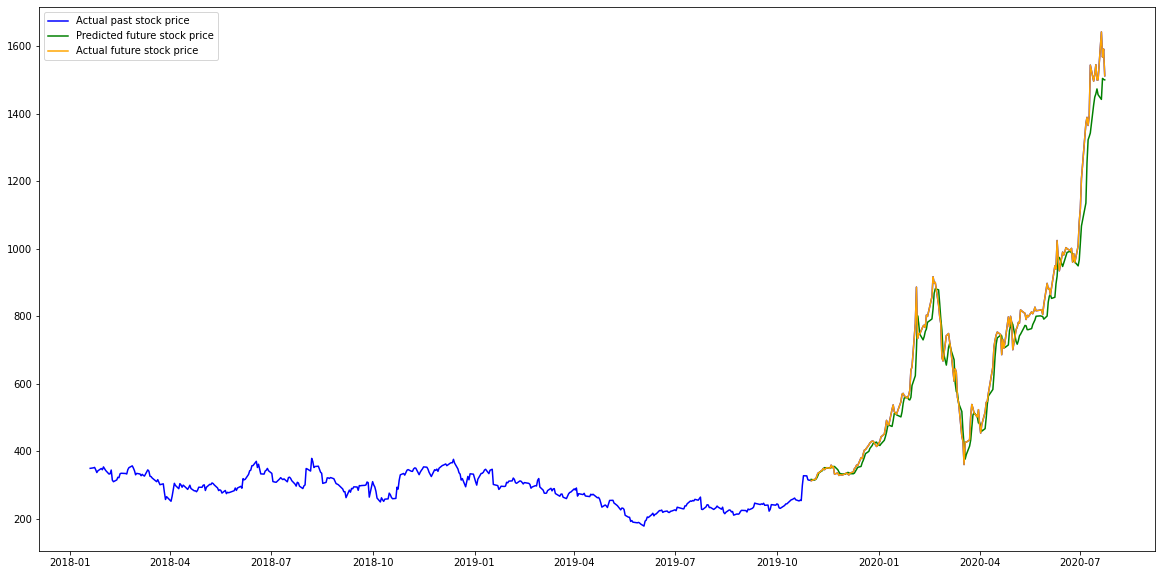

In [22]:
#for plotting
train = new_data[:]
#train_pred = new_data[T:450]
valid = new_data[450:]
#train_pred['Predictions'] = closing_price_train
valid['Predictions'] = closing_price
plt.plot(train['Close'], color='blue', label='Actual past stock price')
#plt.plot(train_pred['Predictions'], color='red', label='Predicted past stock price')
#plt.plot(valid['Predictions'], label='Predicted stock price')
plt.plot(valid['Predictions'], color = 'green', label='Predicted future stock price')
plt.plot(valid['Close'], color = 'orange', label='Actual future stock price')
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


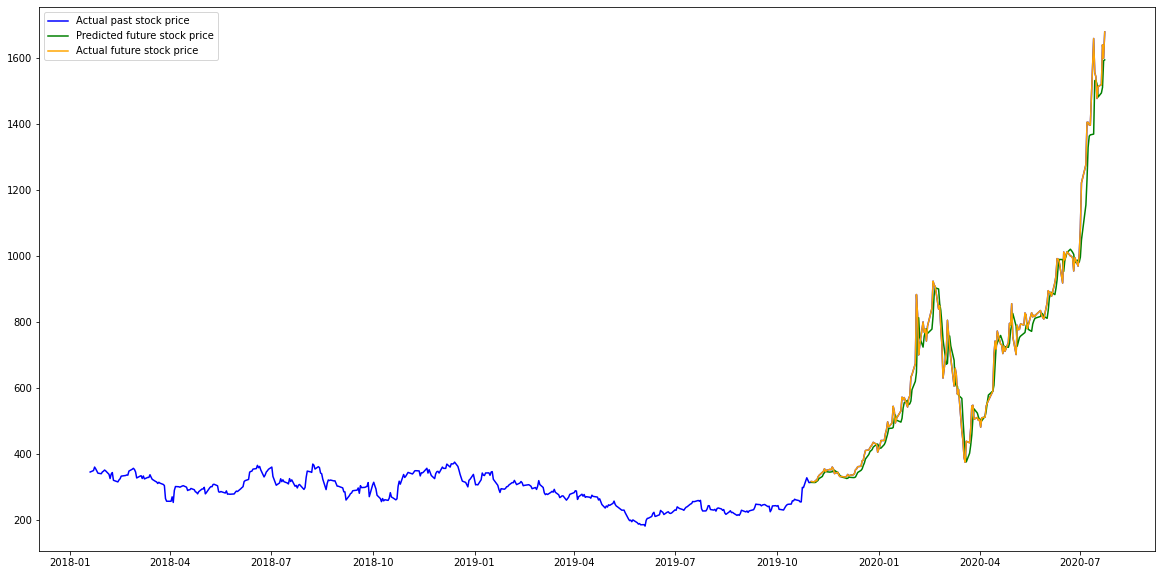

In [69]:
# #for plotting
# train = new_data[:]
# #train_pred = new_data[T:450]
# valid = new_data[450:]
# #train_pred['Predictions'] = closing_price_train
# valid['Predictions'] = closing_price
# plt.plot(train['Open'], color='blue', label='Actual past stock price')
# #plt.plot(train_pred['Predictions'], color='red', label='Predicted past stock price')
# #plt.plot(valid['Predictions'], label='Predicted stock price')
# plt.plot(valid['Predictions'], color = 'green', label='Predicted future stock price')
# plt.plot(valid['Open'], color = 'orange', label='Actual future stock price')
# plt.legend()

In [44]:
#Predictions on test set
closing_price = np.zeros((len(valid)))
X_test = []
for pred in range(len(closing_price)):
  #Single valued output
  if pred<T:
    X_test = new_data[len(train) - T + pred:len(train)].values
    X_test = X_test.reshape(-1,1)
    X_test = scaler.transform(X_test)
    if pred>0:
      X_test = np.concatenate((X_test, closing_price[:pred]), axis = None)  
  if pred>=T:
    X_test = closing_price[pred - T:pred]
  X_test = np.array(X_test)
  X_test = X_test.reshape(-1,1)
  #X_test  = scaler.transform(X_test)

  X_test = np.reshape(X_test, (X_test.shape[1],X_test.shape[0],1))
  closing_price[pred] = model.predict(X_test)
  #closing_price[pred] = scaler.inverse_transform(closing_price[pred]) 

closing_price = closing_price.reshape(-1,1)
closing_price = scaler.inverse_transform(closing_price)
closing_price.shape #single valued output prediction

(182, 1)

In [ ]:
print(closing_price.shape)
print(X_test.shape)
print(x_train.shape)
print(y_train.shape)

In [45]:
closing_price


array([[1434.41658865],
       [1369.84276288],
       [1308.15175718],
       [1254.30578136],
       [1209.49257196],
       [1173.11847887],
       [1143.57760132],
       [1118.76786119],
       [1096.72296158],
       [1076.22348948],
       [1057.10687396],
       [1040.23099744],
       [1026.97601135],
       [1018.73489476],
       [1016.44275785],
       [1020.30632665],
       [1029.84268777],
       [1044.06690387],
       [1061.39925308],
       [1080.05084414],
       [1098.41516544],
       [1115.31015256],
       [1129.57285163],
       [1140.63395895],
       [1148.20707736],
       [1152.19918454],
       [1152.75408988],
       [1150.20077485],
       [1144.78217961],
       [1136.8070406 ],
       [1126.52728609],
       [1114.19912019],
       [1100.11103435],
       [1084.59148646],
       [1068.01326399],
       [1050.78440869],
       [1033.33277097],
       [1016.08288529],
       [ 999.43083833],
       [ 983.72280238],
       [ 969.23714637],
       [ 956.176

In [47]:
#rms error
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms
#np.mean(np.abs(valid - closing_price))
#mean absolute error


526.3822241834924

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


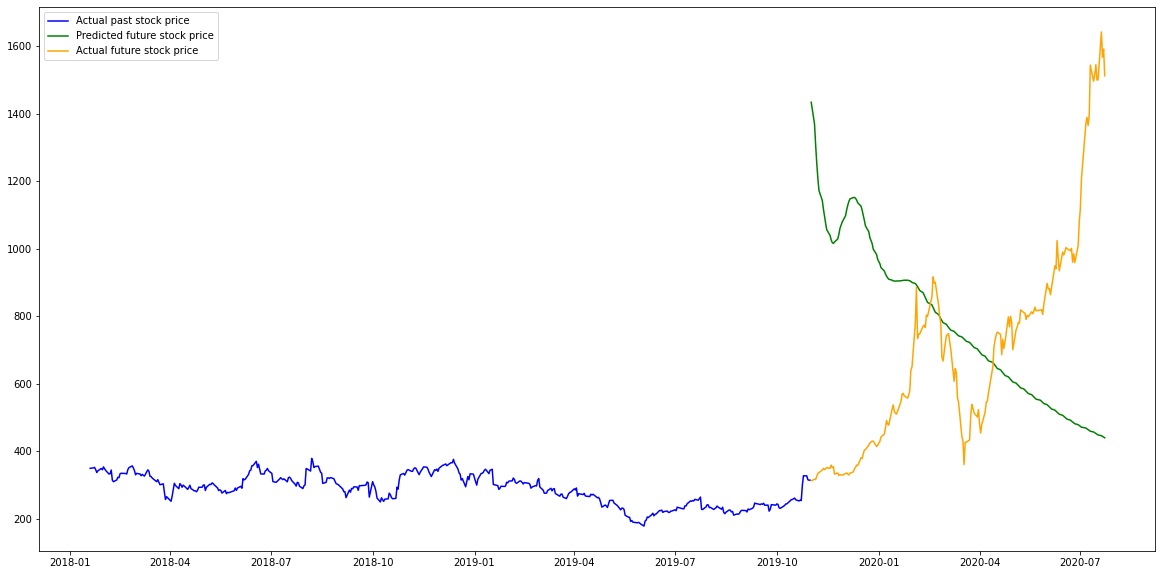

In [48]:
#for plotting
train = new_data[:450]
#train_pred = new_data[T:450]
valid = new_data[450:]
#train_pred['Predictions'] = closing_price_train
valid['Predictions'] = closing_price
plt.plot(train['Close'], color='blue', label='Actual past stock price')
#plt.plot(train_pred['Predictions'], color='red', label='Predicted past stock price')
#plt.plot(valid['Predictions'], label='Predicted stock price')
plt.plot(valid['Predictions'], color = 'green', label='Predicted future stock price')
plt.plot(valid['Close'], color = 'orange', label='Actual future stock price')
plt.legend()



In [20]:
valid

,Close,Predictions
Date,,
2019-11-01,313.31,336.487335
2019-11-04,317.47,336.024780
2019-11-05,317.22,335.527222
2019-11-06,326.58,335.487488
2019-11-07,335.54,337.248596
...,...,...
2020-07-17,1500.84,1484.173096
2020-07-20,1643,1473.886841
2020-07-21,1568.36,1512.721680


In [ ]:
valid.to_csv('/content/drive/My Drive/Covid 19 part(2)/Results_1/TESLA_Predicted_vs_Actual_Stock_Prices_JULY.csv')

In [70]:
#Prediction for 22nd July, 2017
inputs = new_data[len(new_data) - T:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = inputs
X_test = X_test.reshape(1,T,1)

closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)
print('Price on 24th July : {}'.format(closing_price[0][0]))

Price on 24th July : 1637.3134765625


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Covid 19 part(2)/LSTM/AAPL_JAN18_JULY20.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-19,178.610001,179.580002,177.410004,178.460007,172.341141,32425100
1,2018-01-22,177.300003,177.779999,176.600006,177.000000,170.931198,27108600
2,2018-01-23,177.300003,179.440002,176.820007,177.039993,170.969803,32689100
3,2018-01-24,177.250000,177.300003,173.199997,174.220001,168.246521,51105100
4,2018-01-25,174.509995,174.949997,170.529999,171.110001,165.243134,41529000
...,...,...,...,...,...,...,...
622,2020-07-10,381.339996,383.920013,378.820007,383.679993,383.679993,22564300
623,2020-07-13,389.059998,399.820007,381.029999,381.910004,381.910004,47912300
624,2020-07-14,379.359985,389.019989,375.510010,388.230011,388.230011,42747300
625,2020-07-15,395.959991,396.989990,385.959991,390.899994,390.899994,38299500


In [ ]:
data_training = data[data['Date'] < '2019-12-31'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-19,178.610001,179.580002,177.410004,178.460007,172.341141,32425100
1,2018-01-22,177.300003,177.779999,176.600006,177.000000,170.931198,27108600
2,2018-01-23,177.300003,179.440002,176.820007,177.039993,170.969803,32689100
3,2018-01-24,177.250000,177.300003,173.199997,174.220001,168.246521,51105100
4,2018-01-25,174.509995,174.949997,170.529999,171.110001,165.243134,41529000
...,...,...,...,...,...,...,...
485,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.562683,24643000
486,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.831299,12119700
487,2019-12-26,284.820007,289.980011,284.700012,289.910004,288.442780,23280300
488,2019-12-27,291.119995,293.970001,288.119995,289.799988,288.333313,36566500


In [ ]:
data_testing = data[data['Date'] >= '2019-12-31'].copy()
data_testing

,Date,Open,High,Low,Close,Adj Close,Volume
490,2019-12-31,289.929993,293.679993,289.519989,293.649994,292.163818,25201400
491,2020-01-02,296.239990,300.600006,295.190002,300.350006,298.829956,33870100
492,2020-01-03,297.149994,300.579987,296.500000,297.429993,295.924713,36580700
493,2020-01-06,293.790009,299.959991,292.750000,299.799988,298.282715,29596800
494,2020-01-07,299.839996,300.899994,297.480011,298.390015,296.879883,27218000
...,...,...,...,...,...,...,...
622,2020-07-10,381.339996,383.920013,378.820007,383.679993,383.679993,22564300
623,2020-07-13,389.059998,399.820007,381.029999,381.910004,381.910004,47912300
624,2020-07-14,379.359985,389.019989,375.510010,388.230011,388.230011,42747300
625,2020-07-15,395.959991,396.989990,385.959991,390.899994,390.899994,38299500


In [ ]:
training_data = data_training.drop(['Date', 'Adj Close'], axis=1)
training_data

,Open,High,Low,Close,Volume
0,178.610001,179.580002,177.410004,178.460007,32425100
1,177.300003,177.779999,176.600006,177.000000,27108600
2,177.300003,179.440002,176.820007,177.039993,32689100
3,177.250000,177.300003,173.199997,174.220001,51105100
4,174.509995,174.949997,170.529999,171.110001,41529000
...,...,...,...,...,...
485,280.529999,284.250000,280.369995,284.000000,24643000
486,284.690002,284.890015,282.920013,284.269989,12119700
487,284.820007,289.980011,284.700012,289.910004,23280300
488,291.119995,293.970001,288.119995,289.799988,36566500


In [ ]:
scalar = MinMaxScaler()
training_data = scalar.fit_transform(training_data)
training_data.shape

(490, 5)

In [ ]:
x_train = []
y_train = []

T = 60
for i in range(T, training_data.shape[0]):
  x_train.append(training_data[i-T:i])
  y_train.append(training_data[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(430, 60, 5)
(430,)


In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, activation='tanh', input_shape=(x_train.shape[1],5)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, activation='tanh'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 60, 50)            11200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 91,901
Trainable params: 91,901
Non-trainable params: 0
__________________________________________________

In [ ]:
import time
start = time.time()
model.fit(x_train, y_train, epochs=50, batch_size=8)
end = time.time()
print('Run time: {}'.format((end-start)/60))

Epoch 1/50
54/54 [==============================] - 2s 40ms/step - loss: 0.0159
Epoch 2/50
54/54 [==============================] - 2s 40ms/step - loss: 0.0041
Epoch 3/50
54/54 [==============================] - 2s 40ms/step - loss: 0.0029
Epoch 4/50
54/54 [==============================] - 2s 40ms/step - loss: 0.0030
Epoch 5/50
54/54 [==============================] - 2s 40ms/step - loss: 0.0028
Epoch 6/50
54/54 [==============================] - 2s 40ms/step - loss: 0.0028
Epoch 7/50
54/54 [==============================] - 2s 41ms/step - loss: 0.0024
Epoch 8/50
54/54 [==============================] - 2s 40ms/step - loss: 0.0024
Epoch 9/50
54/54 [==============================] - 2s 40ms/step - loss: 0.0038
Epoch 10/50
54/54 [==============================] - 2s 40ms/step - loss: 0.0022
Epoch 11/50
54/54 [==============================] - 2s 40ms/step - loss: 0.0019
Epoch 12/50
54/54 [==============================] - 2s 40ms/step - loss: 0.0020
Epoch 13/50
54/54 [==================

In [ ]:
past_T_days = data_training.tail(T)

df = past_T_days.append(data_testing, ignore_index = True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-04,225.639999,227.490005,223.889999,227.009995,225.185043,34619700
1,2019-10-07,226.270004,229.929993,225.839996,227.059998,225.234634,30576500
2,2019-10-08,225.820007,228.059998,224.330002,224.399994,222.596024,27955000
3,2019-10-09,227.029999,227.789993,225.639999,227.029999,225.204895,18692600
4,2019-10-10,227.929993,230.440002,227.300003,230.089996,228.240280,28253400
...,...,...,...,...,...,...,...
192,2020-07-10,381.339996,383.920013,378.820007,383.679993,383.679993,22564300
193,2020-07-13,389.059998,399.820007,381.029999,381.910004,381.910004,47912300
194,2020-07-14,379.359985,389.019989,375.510010,388.230011,388.230011,42747300
195,2020-07-15,395.959991,396.989990,385.959991,390.899994,390.899994,38299500


In [ ]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df

,Open,High,Low,Close,Volume
0,225.639999,227.490005,223.889999,227.009995,34619700
1,226.270004,229.929993,225.839996,227.059998,30576500
2,225.820007,228.059998,224.330002,224.399994,27955000
3,227.029999,227.789993,225.639999,227.029999,18692600
4,227.929993,230.440002,227.300003,230.089996,28253400
...,...,...,...,...,...
192,381.339996,383.920013,378.820007,383.679993,22564300
193,389.059998,399.820007,381.029999,381.910004,47912300
194,379.359985,389.019989,375.510010,388.230011,42747300
195,395.959991,396.989990,385.959991,390.899994,38299500


In [ ]:
inputs = scalar.transform(df)
inputs.shape

(197, 5)

In [3]:
import tensorflow as tf
dataset = tf.data.Dataset.range(10)
dataset

<RangeDataset shapes: (), types: tf.int64>

In [4]:
#dataset creation
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))

In [9]:
for item in dataset:
  print(item)

<_VariantDataset shapes: (), types: tf.int64>
<_VariantDataset shapes: (), types: tf.int64>
<_VariantDataset shapes: (), types: tf.int64>
<_VariantDataset shapes: (), types: tf.int64>
<_VariantDataset shapes: (), types: tf.int64>
<_VariantDataset shapes: (), types: tf.int64>


In [44]:
#mapping dataset so that T=5
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset

<WindowDataset shapes: DatasetSpec(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorShape([])), types: DatasetSpec(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorShape([]))>

In [45]:
for window_dataset in dataset:
  print(window_dataset)

<_VariantDataset shapes: (None,), types: tf.int64>
<_VariantDataset shapes: (None,), types: tf.int64>


In [17]:
for window_dataset in dataset:
  for val in window_dataset:
    print(val.numpy(), end=' ')
  print()

0 1 2 3 4 
1 2 3 4 5 
2 3 4 5 6 
3 4 5 6 7 
4 5 6 7 8 
5 6 7 8 9 


In [46]:
#mapping the dataset into format so that we can get numpy array from them
dataset = dataset.flat_map(lambda window: window.batch(5))

In [35]:
for window in dataset:
  print(window.numpy())
 

[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]


In [5]:
#mapping the dataset to x and y, where all values but last value is x, and last value is y
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
for x, y in dataset:
  print(x.numpy())
  print(y.numpy())

[0 1 2 3]
[4]
[1 2 3 4]
[5]
[2 3 4 5]
[6]
[3 4 5 6]
[7]
[4 5 6 7]
[8]
[5 6 7 8]
[9]


In [58]:
#shuffling the dataset
dataset = dataset.shuffle(buffer_size=10)
for x,y in dataset:
  print(x.numpy())
  print(y.numpy())

[5 6 7 8]
[9]
[4 5 6 7]
[8]
[1 2 3 4]
[5]
[2 3 4 5]
[6]
[3 4 5 6]
[7]
[0 1 2 3]
[4]


In [7]:
#Creating batches in the dataset of size 2
dataset = dataset.batch(2).prefetch(1)

In [63]:
for x,y in dataset:
  print(x.numpy())
  print(y.numpy())

[[3 4 5 6]
 [1 2 3 4]]
[[7]
 [5]]
[[4 5 6 7]
 [0 1 2 3]]
[[8]
 [4]]
[[2 3 4 5]
 [5 6 7 8]]
[[6]
 [9]]
